### Test POP with qubic regularization

In [1]:
include("LiPoSID.jl")
using QuantumOptics
basis = NLevelBasis(2)
using Plots
using HDF5
using StatsPlots

In [2]:
parentdir = pwd()
data_dir = parentdir*"\\DATA\\"
models_dir = parentdir*"\\MODELS\\"

"C:\\Users\\Zakhar\\Documents\\GitHub\\POP_fail\\MODELS\\"

In [3]:
function get_operators(file, γᵢᵗˣᵗ)
    h5open(file,"r") do fid # read-only
        H = read(fid["gamma_"*γᵢᵗˣᵗ]["H"])
        A = read(fid["gamma_"*γᵢᵗˣᵗ]["A"])
        return H, A
    end
end

get_operators (generic function with 1 method)

In [4]:
#models_file = "POP_2CUT_train-B_reg3_2023-Jun-07_at_19-34.h5"
models_file = "POP_2CUT_train-B_reg3_012023-Jun-07_at_22-01.h5"

"POP_2CUT_train-B_reg3_012023-Jun-07_at_22-01.h5"

In [5]:
F = []

test_files = ["State_D"*string(n) for n=1:20]

γᵗˣᵗ = [ "0.079477", "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

@time for γᵢᵗˣᵗ in γᵗˣᵗ
    
    println("γ = ", γᵢᵗˣᵗ)
    
    Fᵧ = []
    
    H, A = get_operators(models_dir*models_file, γᵢᵗˣᵗ)
    
    @show A

    for df in test_files # loop over initial states

        print(df*" ")

        # Read EXACT data series of Kurt data

        ρ, t = LiPoSID.get_rho_series(data_dir*df*"_2CUT_data.h5", string(γᵢᵗˣᵗ))

        ρₑₓ = convert(Vector{Matrix{ComplexF64}}, ρ)
        t = convert(Vector{Float64}, t)

        # Restore data series POP identified

        ρ₀ = ρₑₓ[1]

        ρₑₓʳᵉᵍ = LiPoSID.Lindblad_time_evolution(basis, ρ₀, t, H, [A])


        # Calculating fidelity series
        
        max_step = max(length(ρₑₓ), length(ρₑₓʳᵉᵍ))

        Fᵧ = vcat(Fᵧ, LiPoSID.fidelity_series(basis, ρₑₓ[1:max_step], ρₑₓʳᵉᵍ[1:max_step]))

    end # of files (initial states) df loop
    
    println()
        
    push!(F, convert.(Float64, Fᵧ))

end


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

γ = 0.079477
A = ComplexF64[2.894743042295058e-5 + 1.1220760870040019e-5im -0.31860941399201065 + 0.00027637513507347507im; -0.07958668177271726 - 0.004712145626189004im -2.894743042295058e-5 - 1.1220760870040019e-5im]
State_D1 State_D2 State_D3 State_D4 State_D5 State_D6 State_D7 State_D8 State_D9 State_D10 State_D11 State_D12 State_D13 State_D14 State_D15 State_D16 State_D17 State_D18 State_D19 State_D20 
γ = 0.25133
A = ComplexF64[-0.0002828966214057992 + 5.542739811981515e-5im -0.7746313357098805 + 0.00030946685890344673im; -0.1505475693009558 - 0.008699206946910317im 0.0002828966214057992 - 5.542739811981515e-5im]
State_D1 State_D2 State_D3 State_D4 State_D5 State_D6 State_D7 State_D8 State_D9 State_D10 State_D11 State_D12 State_D13 State_D14 State_D15 State_D16 State_D17 State_D18 State_D19 State_D20 
γ = 0.79477
A = ComplexF64[-0.007406805172898384 + 0.005452247754086767im -3.974350353176088 + 0.0022539289270732815im; -0.8472776590933386 - 0.05292827651100365im 0.007406805172898

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\integrator_interface.jl:504


LoadError: BoundsError: attempt to access 176-element Vector{Matrix{ComplexF64}} at index [1:914]

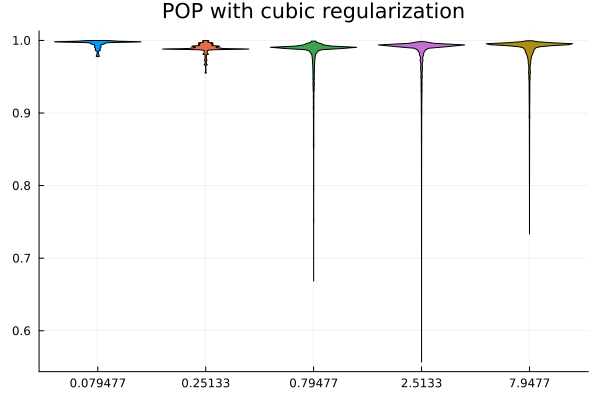

In [6]:
violin(F, labels="")
plot!(xticks = (1:length(γᵗˣᵗ), γᵗˣᵗ))
title!("POP with cubic regularization")

In [7]:
lf = [log10.(abs.(1 .- f)) for f in F]

for i in 1:length(lf)
    lf[i][lf[i] .< -5] .= -5
end

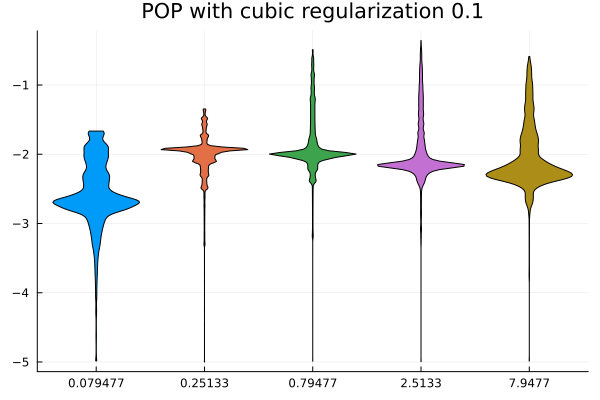

In [8]:
violin(lf, labels="")
plot!(xticks = (1:length(γᵗˣᵗ), γᵗˣᵗ))
title!("POP with cubic regularization 0.1")
#savefig("POP_cubic_reg_01.png")